In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data1 = pd.read_csv('/content/StudentsPerformance.csv')

In [139]:
data1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [140]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [141]:
data1.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


An Institution wishes to find out their student’s ability in mathematics, reading and writing skills. The Institution wants to do an exploratory study to check the following information.

  1. Find out how many males and females participated in the test.
  2. What do you think about the students' parental level of education?
  3. Who scores the most on average for math, reading and writing based on  
               ● Gender
               ● Test preparation course

  4. What do you think about the scoring variation for math, reading and writing based on
               ● Gender
               ● Test preparation course

  5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [142]:
#  1.  Find out how many males and females participated in the test.

In [143]:
count_female = data1['gender'].value_counts()['female']
count_male = data1['gender'].value_counts()['male']
print('No. of females:', count_female)
print('No. of males:', count_male)

No. of females: 518
No. of males: 482


In [144]:
# 2.  What do you think about the students' parental level of education?

# **Approach 1**

In [145]:
#   finding average scores of students against the parental level of education.
par_edu = data1.groupby('parental level of education').mean()
par_edu

<ipython-input-145-d26dbae362fa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  par_edu = data1.groupby('parental level of education').mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


In [146]:
#   Finding the parental level of education with maximum scores of students
par_edu.nlargest(1, ['math score', 'reading score', 'writing score'])

,math score,reading score,writing score
parental level of education,,,
master's degree,70.254237,75.949153,75.677966


# Inference : Students with parents who have a master's degree have a better performance in the exams than others

## Approach 2

In [147]:
par_edu1 = data1['parental level of education'].value_counts()
par_edu1

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

# Inference : Parents studied in some college is highest. Parents with master's degree is too low.

In [148]:
#   3. Who scores the most on average for math, reading and writing based on
#           ● Gender
#           ● Test preparation course

In [149]:
#   Based on Gender
gen_avg_scores = data1.groupby(['gender']).mean()
gen_avg_scores

<ipython-input-149-98a0615d7747>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_avg_scores = data1.groupby(['gender']).mean()


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


<ipython-input-150-2f8cfda50454>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_avg_scores = data1.groupby(['gender']).mean().plot.bar()


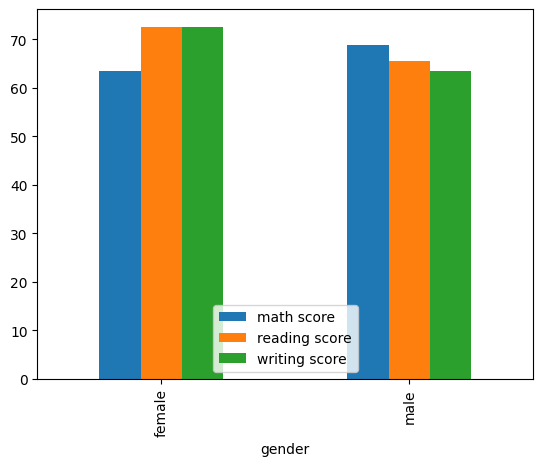

In [150]:
#   Finding which gender scores the most on average for math, reading and writing
gen_avg_scores = data1.groupby(['gender']).mean().plot.bar()
plt.show()

# Inference :

1. Males scores the most on average for math

2. Females scores the most on average for reading

3. Females scores the most on average for writing

In [151]:
#   Based on Test preparation course
tpc_avg_scores = data1.groupby(['test preparation course','gender']).mean()
tpc_avg_scores

<ipython-input-151-34eb03628fe8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tpc_avg_scores = data1.groupby(['test preparation course','gender']).mean()


math score  reading score  writing score
test preparation course gender                                          
completed               female   67.108696      77.375000      78.793478
                        male     72.988506      70.793103      70.339080
none                    female   61.320359      69.955090      68.982036
                        male     66.467532      62.581169      59.551948

<ipython-input-152-f8ab21654573>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_avg_scores = data1.groupby(['test preparation course','gender']).mean().plot.bar()


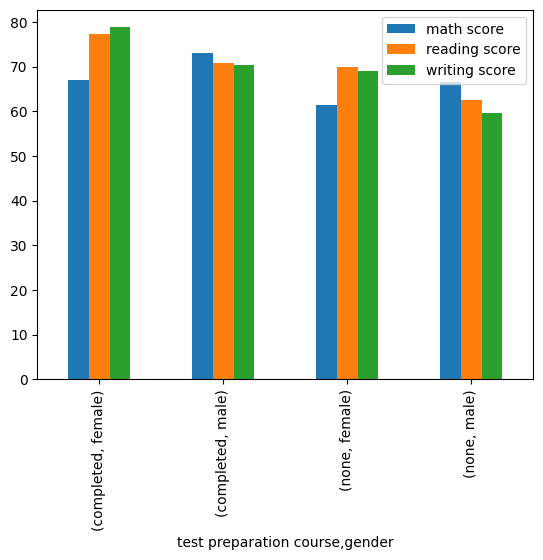

In [152]:
#   Finding who scores the most on average for math, reading and writing
gen_avg_scores = data1.groupby(['test preparation course','gender']).mean().plot.bar()
plt.show()

# Inference :
Students who have completed the test preperation has secured more marks than the others.


In [153]:
#   4. What do you think about the scoring variation for math, reading and writing based on
#           ● Gender
#           ● Test preparation course

In [154]:
#   Based on Gender
gen_avg_scores1 = data1[['gender', 'math score', 'reading score', 'writing score']].groupby(['gender']).var()
gen_avg_scores1

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


# Inference :

Scoring variation for math, reading and writing is highest for females



In [155]:
#   Based on Test preparation course
gen_avg_scores2 = data1[['test preparation course', 'math score', 'reading score', 'writing score']].groupby(['test preparation course']).var()
gen_avg_scores2

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


# Inference :

Scoring variation for math, reading and writing is highest for those who has not completed the test preparation course

In [156]:
#   5. The management needs your help to give bonus points to the top 25% of students based on their
#      math score, so how will you help the management to achieve this.

In [157]:
#  sorting in the descending order of math score
data_sort = data1.sort_values(by='math score', ascending=False)

In [158]:
#  calculating the no. of records that falls under 'top 25% math score' category
top_per_val = int(len(data_sort)*(25/100))
top_per_val

250

In [159]:
#  Select the records having top 25% math score
data_top = data_sort.nlargest(top_per_val,'math score')
data_top

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [160]:
#  assigning bonus points to top scoring 25% students
bon_pts = 5   # bonus points given is 5
data_top['Bonus Points'] = bon_pts
data_top

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus Points
999,male,group E,bachelor's degree,standard,completed,100,100,100,5
996,male,group A,some college,standard,completed,100,96,86,5
515,female,group E,some college,standard,none,100,92,97,5
517,female,group E,associate's degree,standard,none,100,100,100,5
516,female,group E,bachelor's degree,standard,none,100,100,100,5
...,...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77,5
855,male,group E,associate's degree,free/reduced,completed,77,69,68,5
854,male,group D,some high school,standard,completed,77,68,69,5
853,male,group D,associate's degree,free/reduced,none,77,78,73,5


In [161]:
#  Displaying top 25% records with math score and bonus points
data_top[['math score','Bonus Points']]

,math score,Bonus Points
999,100,5
996,100,5
515,100,5
517,100,5
516,100,5
...,...,...
856,77,5
855,77,5
854,77,5
853,77,5
